In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium


In [2]:
df = pd.read_csv('/kaggle/input/olx-cars-dataset/OLX_cars_dataset.csv')

In [3]:
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Page
0,1080434207,Changan Alsvin 1.5 Lumiere,Changan,Alsvin,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic,Used,"DHA Phase 8, Lahore",Changan Alsvin 1.5 Lumiere model 2022 TOTAL GE...,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4153072...,https://www.olx.com.pk/item/changan-alsvin-15-...
1,1080155972,Changan alsvin lumiere 2022 Model,Changan,Alsvin,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic,Used,"Walton Road, Lahore",Changan Alsvin Fully Automatic 1.5\nunder use ...,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4104300...,https://www.olx.com.pk/item/changan-alsvin-lum...
2,1080646142,chang an Alsvin Lumiere,Changan,Alsvin,2021,17000,3950000,Petrol,Punjab,Original,Local,Automatic,Used,"MM Alam Road, Lahore",changan Alsvin\n17 000 driven\nfull original\n...,"ABS, Air Bags, Air Conditioning, Alloy Rims, C...",['https://images.olx.com.pk/thumbnails/4133439...,https://www.olx.com.pk/item/chang-an-alsvin-lu...
3,1080491687,Changan alsvin Lumiere 2022,Changan,Alsvin,2022,15000,3785000,Petrol,Punjab,Original,Local,Manual,Used,"Jeewan City - Phase 2, Sahiwal",Just like Brand new Car even fragrance of new ...,"Air Conditioning, Alloy Rims, CD Player, Casse...",['https://images.olx.com.pk/thumbnails/4130063...,https://www.olx.com.pk/item/changan-alsvin-lum...
4,1080971973,Alsvin Lumeire Model 2022 - Urgent Sale,Changan,Alsvin,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic,Used,"H-15, Islamabad","Very well maintained car\nfirst owner, islamab...","ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4152971...,https://www.olx.com.pk/item/alsvin-lumeire-mod...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              8721 non-null   int64 
 1   Car Name           8721 non-null   object
 2   Make               8721 non-null   object
 3   Model              8721 non-null   object
 4   Year               8721 non-null   int64 
 5   KM's driven        8721 non-null   int64 
 6   Price              8721 non-null   int64 
 7   Fuel               8721 non-null   object
 8   Registration city  8721 non-null   object
 9   Car documents      8721 non-null   object
 10  Assembly           8721 non-null   object
 11  Transmission       8721 non-null   object
 12  Condition          8721 non-null   object
 13  Seller Location    8721 non-null   object
 14  Description        8721 non-null   object
 15  Car Features       8721 non-null   object
 16  Images URL's       8721 non-null   object


In [5]:
df.describe()

,Ad ID,Year,KM's driven,Price
count,8.721000e+03,8721.000000,8721.000000,8.721000e+03
mean,1.079728e+09,2012.671712,95348.594198,2.097328e+06
std,2.859596e+06,5.912057,61550.623242,1.157404e+06
min,1.019824e+09,1989.000000,1.000000,1.850000e+05
25%,1.080021e+09,2007.000000,52000.000000,1.150000e+06
50%,1.080550e+09,2013.000000,90000.000000,1.900000e+06
75%,1.080773e+09,2018.000000,124000.000000,2.820000e+06
max,1.080975e+09,2024.000000,533528.000000,5.000000e+06


In [6]:
# Check for missing values
print(df.isnull().sum())

# Handling missing values (replace NaN values with appropriate methods)
# Example: Replace missing values in 'KM's driven' with the median
df['KM\'s driven'].fillna(df['KM\'s driven'].median(), inplace=True)
# Perform similar operations for other columns with missing values

# Verify that missing values are handled
print(df.isnull().sum())

Ad ID                0
Car Name             0
Make                 0
Model                0
Year                 0
KM's driven          0
Price                0
Fuel                 0
Registration city    0
Car documents        0
Assembly             0
Transmission         0
Condition            0
Seller Location      0
Description          0
Car Features         0
Images URL's         0
Car Page             0
dtype: int64
Ad ID                0
Car Name             0
Make                 0
Model                0
Year                 0
KM's driven          0
Price                0
Fuel                 0
Registration city    0
Car documents        0
Assembly             0
Transmission         0
Condition            0
Seller Location      0
Description          0
Car Features         0
Images URL's         0
Car Page             0
dtype: int64


**What is the distribution of cars based on the 'Year' column?**

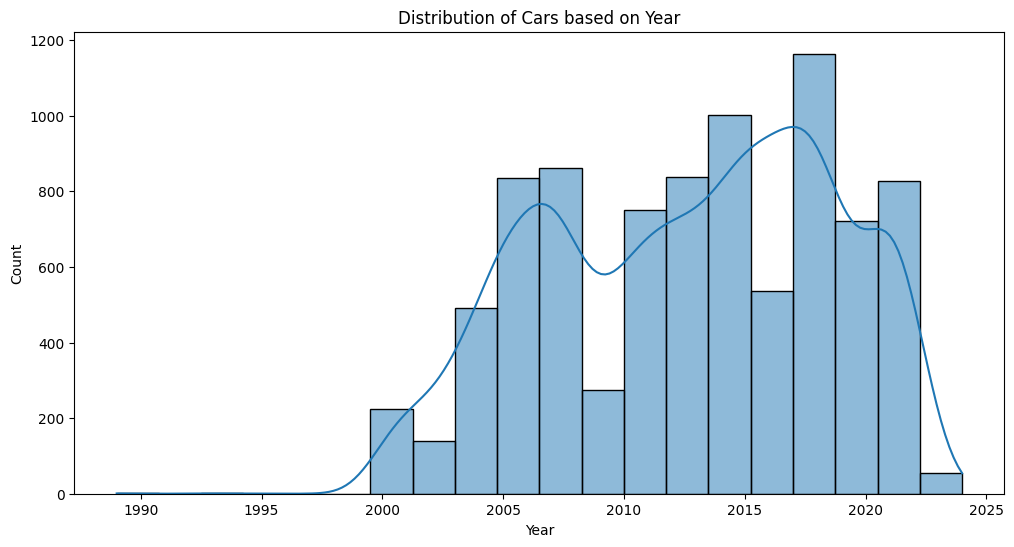

In [7]:
# Plotting distribution of cars based on the 'Year' column
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=20, kde=True)
plt.title('Distribution of Cars based on Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


**What are the top car makes in the dataset?**

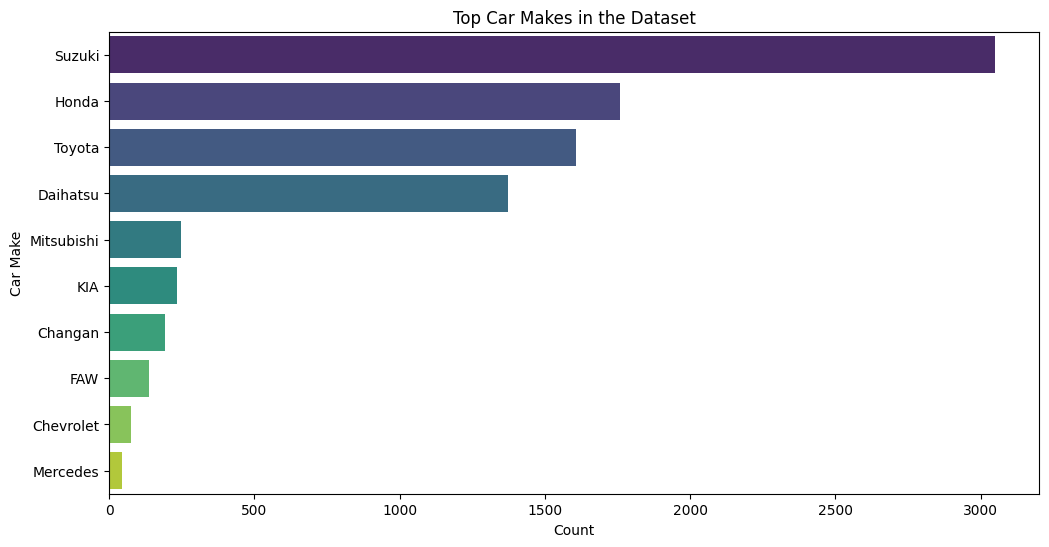

In [8]:
# Count the occurrences of each car make
top_makes = df['Make'].value_counts().head(10)

# Plotting the top car makes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title('Top Car Makes in the Dataset')
plt.xlabel('Count')
plt.ylabel('Car Make')
plt.show()


**How does the price vary with car condition?**

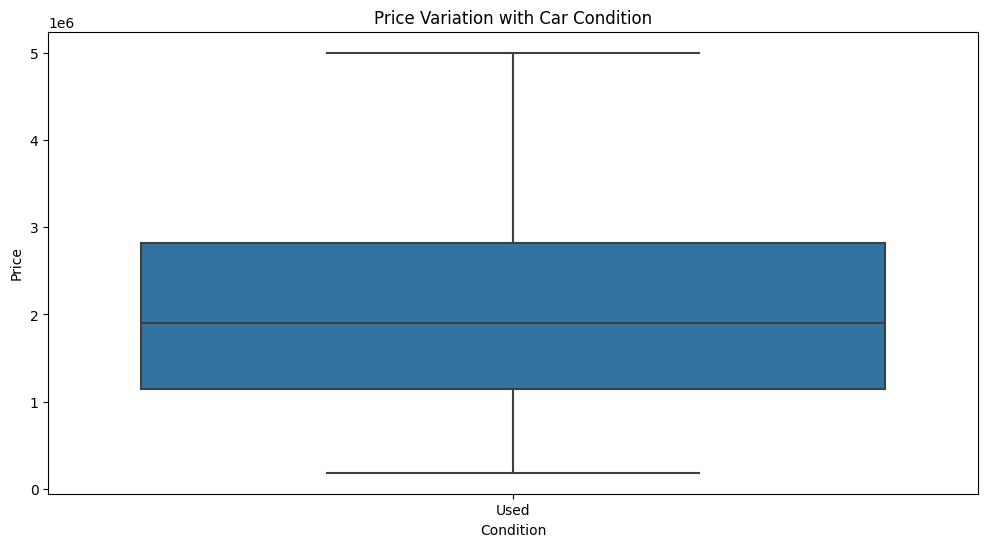

In [9]:
# Plotting boxplot to show the relationship between 'Condition' and 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Price', data=df)
plt.title('Price Variation with Car Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


**How are the different fuel types distributed in the dataset?**

In [10]:
# Plotting a pie chart for the distribution of fuel types
fuel_counts = df['Fuel'].value_counts()
fig = px.pie(fuel_counts, names=fuel_counts.index, title='Distribution of Fuel Types')
fig.show()


**What is the average price of cars based on the assembly type?**

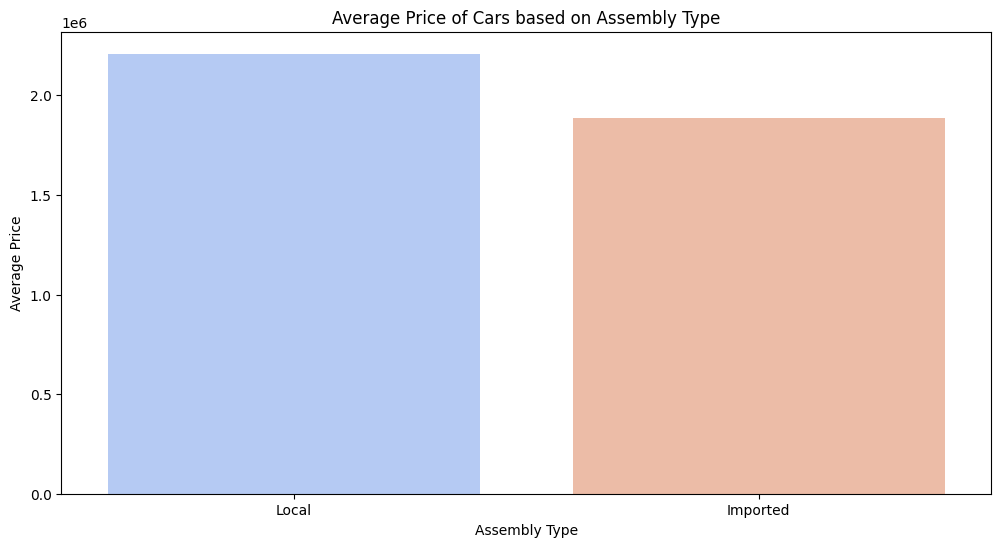

In [11]:
# Plotting a bar chart for average price based on assembly type
avg_price_by_assembly = df.groupby('Assembly')['Price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Assembly', y='Price', data=avg_price_by_assembly, palette='coolwarm')
plt.title('Average Price of Cars based on Assembly Type')
plt.xlabel('Assembly Type')
plt.ylabel('Average Price')
plt.show()


**How many cars have valid car documents?**

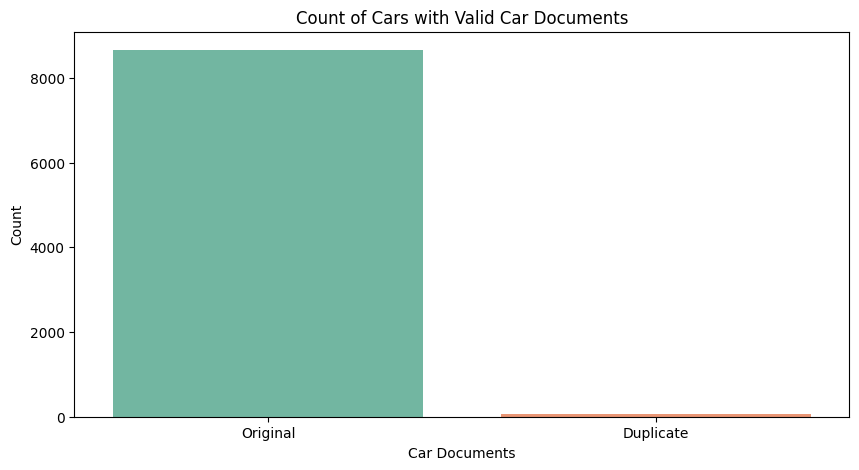

In [12]:
# Plotting a count plot for car documents
plt.figure(figsize=(10, 5))
sns.countplot(x='Car documents', data=df, palette='Set2')
plt.title('Count of Cars with Valid Car Documents')
plt.xlabel('Car Documents')
plt.ylabel('Count')
plt.show()


**Is there any correlation between numerical features?**

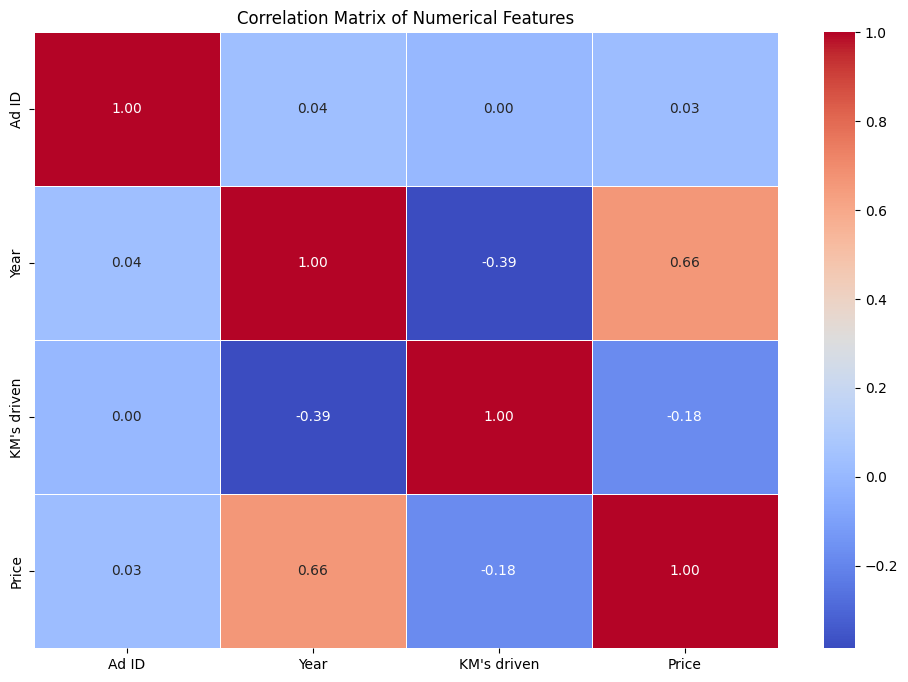

In [13]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating and plotting correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**What are the most common car features mentioned in the dataset?**

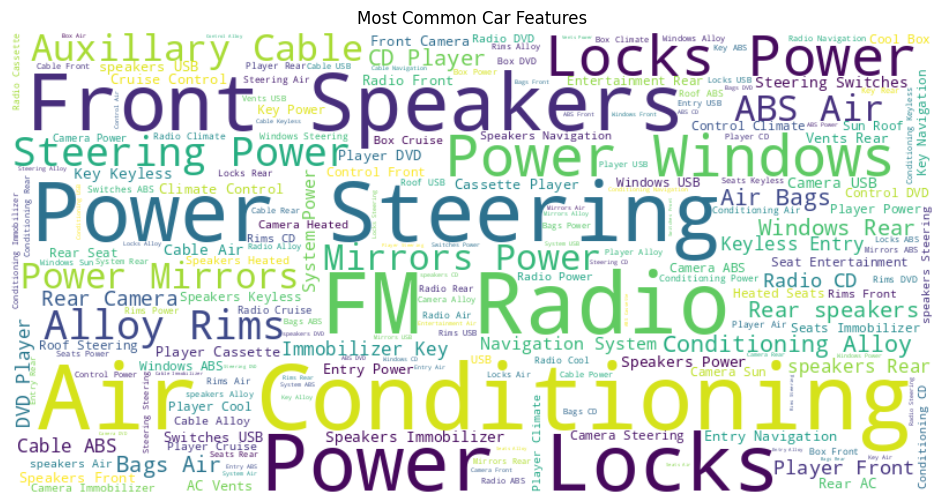

In [14]:
# Extracting and counting the most common car features
from wordcloud import WordCloud

features_text = ' '.join(df['Car Features'].dropna())
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(features_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Car Features')
plt.show()


**How does the distribution of prices vary for the top car models?**

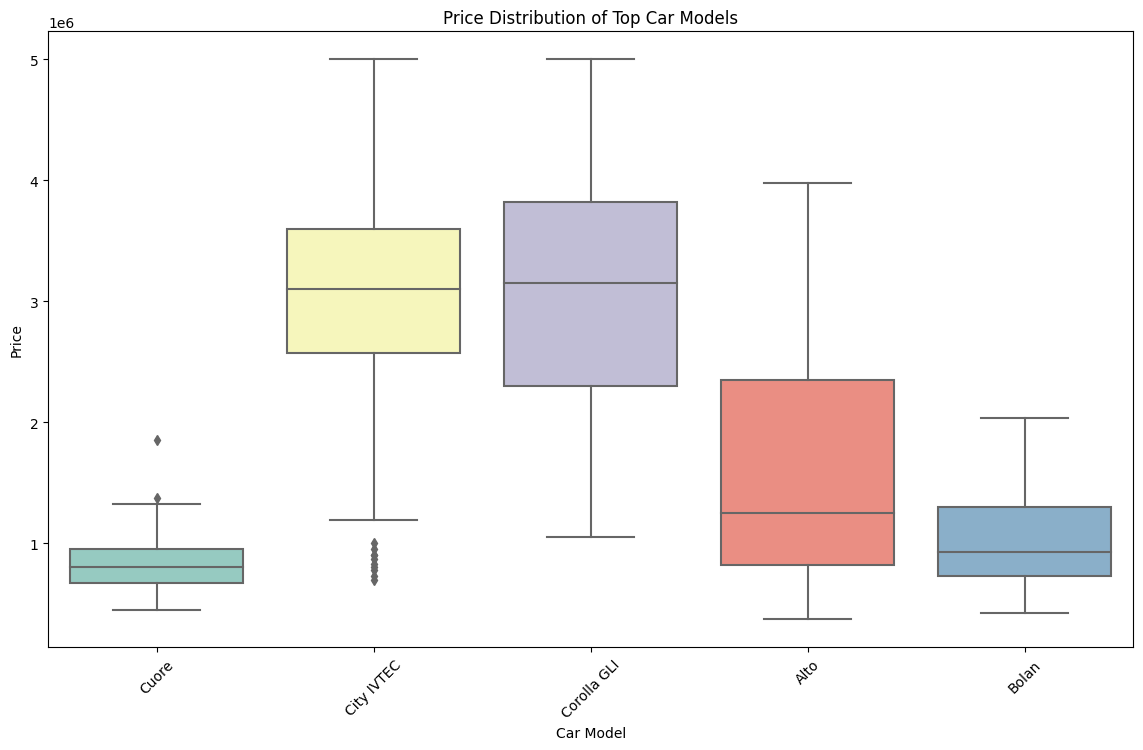

In [15]:
# Select the top car models
top_models = df['Model'].value_counts().head(5).index

# Plotting boxplots for price distribution of the top car models
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Price', data=df[df['Model'].isin(top_models)], palette='Set3')
plt.title('Price Distribution of Top Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


**Are there any outliers in the 'Price' column, and how are they distributed?**

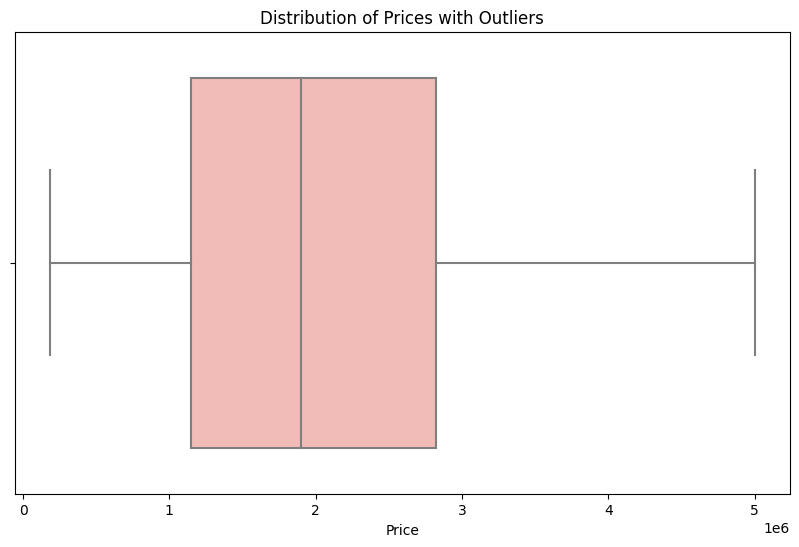

In [16]:
# Plotting a boxplot to identify outliers in the 'Price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=df, palette='Pastel1')
plt.title('Distribution of Prices with Outliers')
plt.xlabel('Price')
plt.show()


**What is the distribution of car conditions based on the transmission type?**

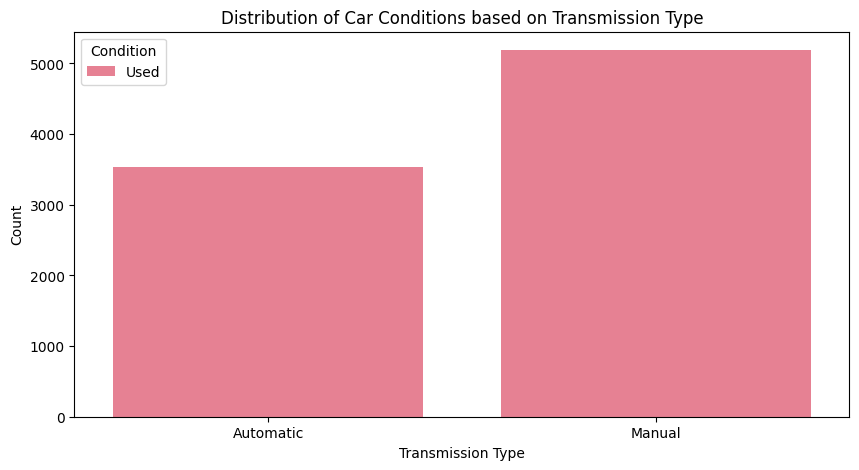

In [17]:
# Plotting a count plot for car condition based on transmission type
plt.figure(figsize=(10, 5))
sns.countplot(x='Transmission', hue='Condition', data=df, palette='husl')
plt.title('Distribution of Car Conditions based on Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


**How is the average price distributed across different registration cities?**

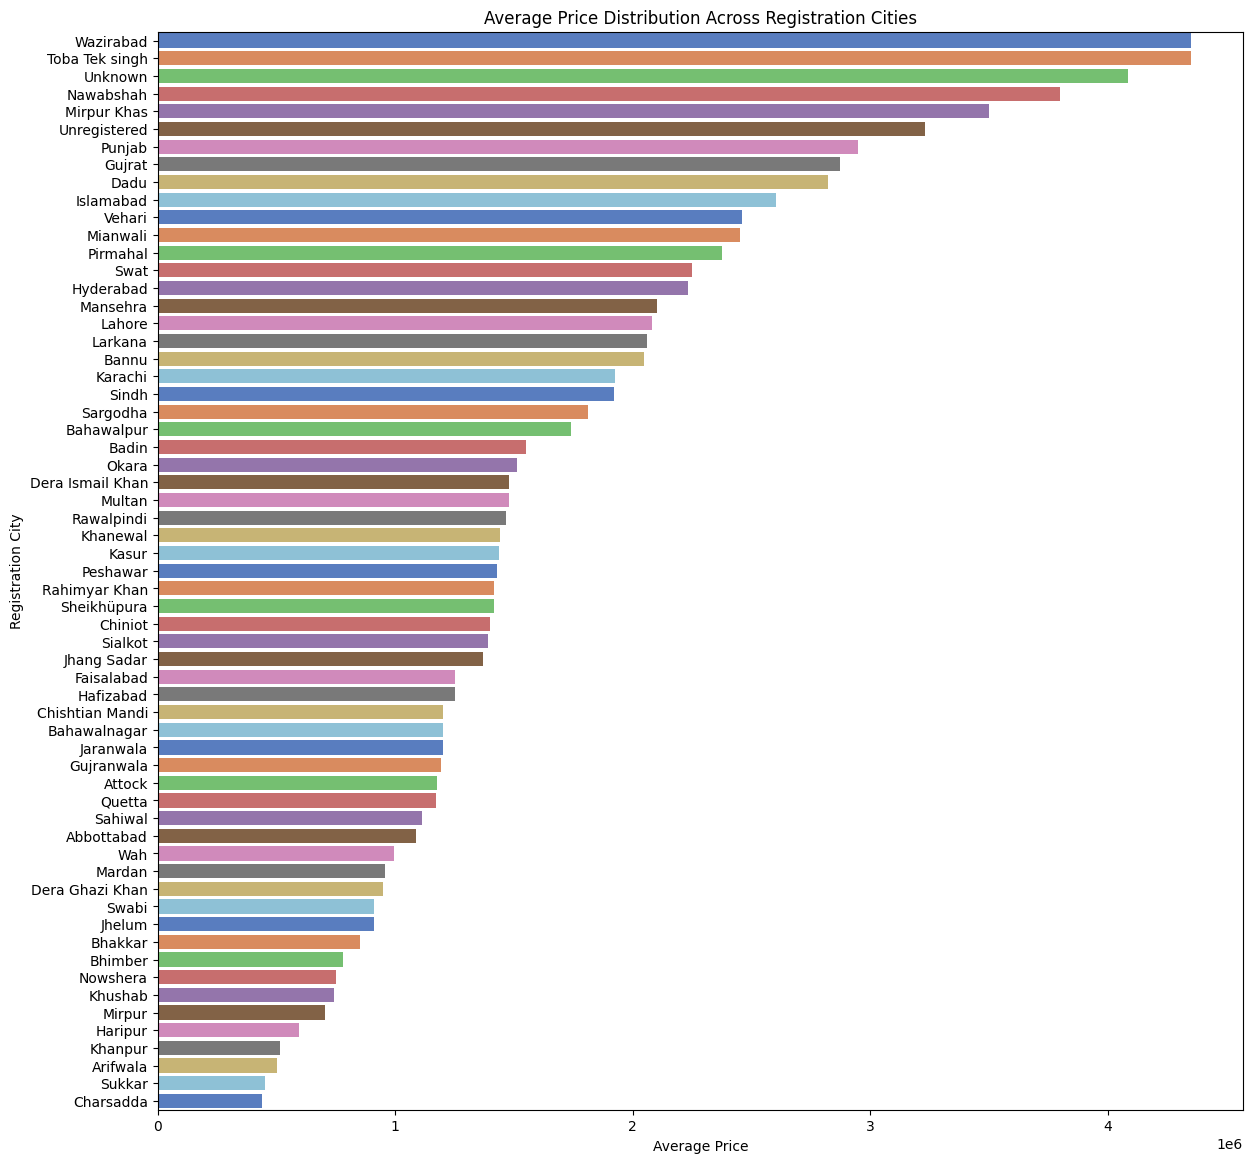

In [18]:
# Plotting a bar chart for average price based on registration city
avg_price_by_city = df.groupby('Registration city')['Price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 14))
sns.barplot(x='Price', y='Registration city', data=avg_price_by_city, palette='muted')
plt.title('Average Price Distribution Across Registration Cities')
plt.xlabel('Average Price')
plt.ylabel('Registration City')
plt.show()


**What are the most common words used in car descriptions?**

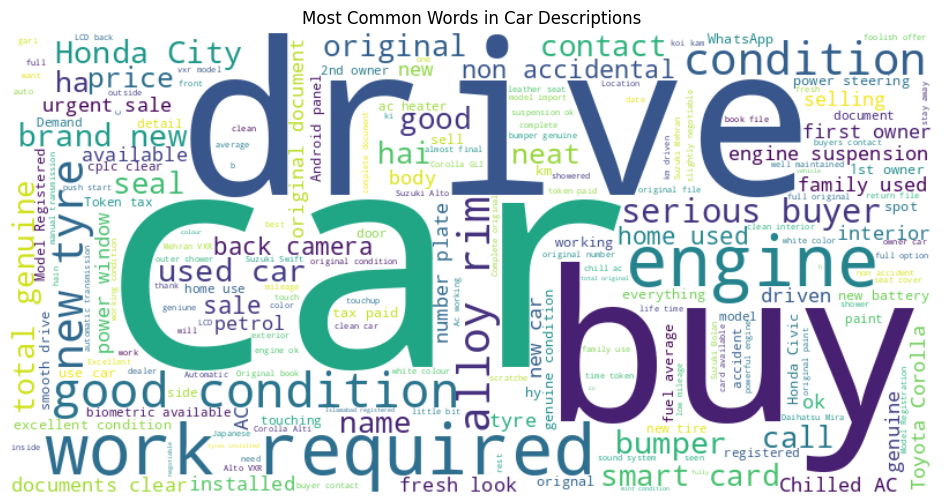

In [19]:
# Extracting and counting the most common words in car descriptions
from wordcloud import WordCloud

desc_text = ' '.join(df['Description'].dropna())
wordcloud_desc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(desc_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Car Descriptions')
plt.show()


**How does the distribution of prices vary with the year of the car?**

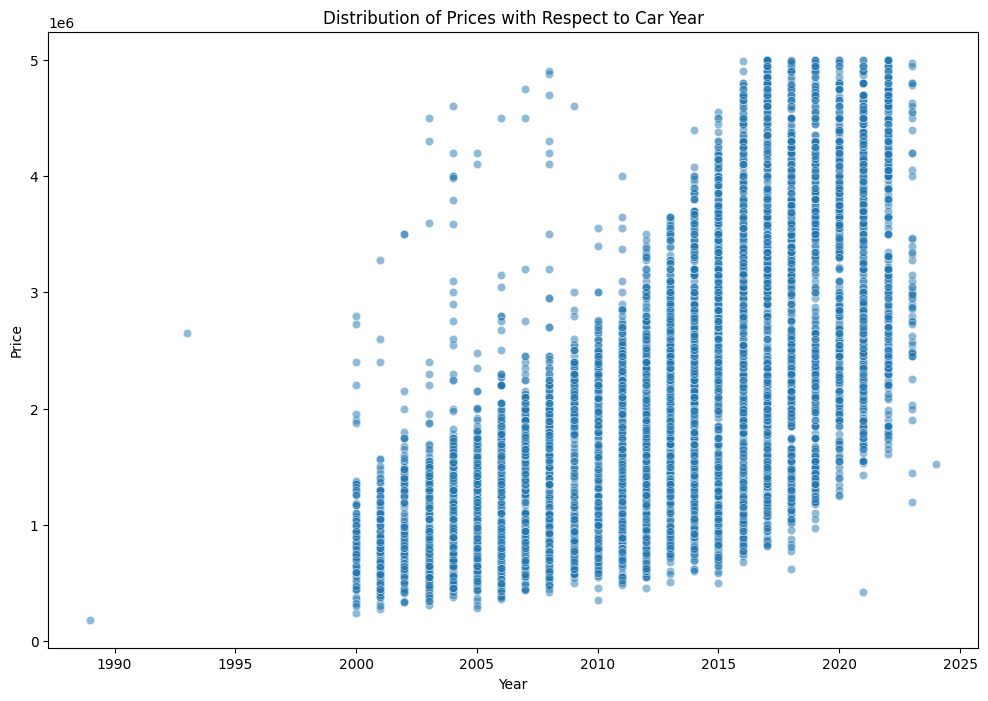

In [20]:
# Scatter plot to show the relationship between 'Year' and 'Price'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Price', data=df, alpha=0.5)
plt.title('Distribution of Prices with Respect to Car Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


**What is the distribution of cars based on their transmission type and fuel?**

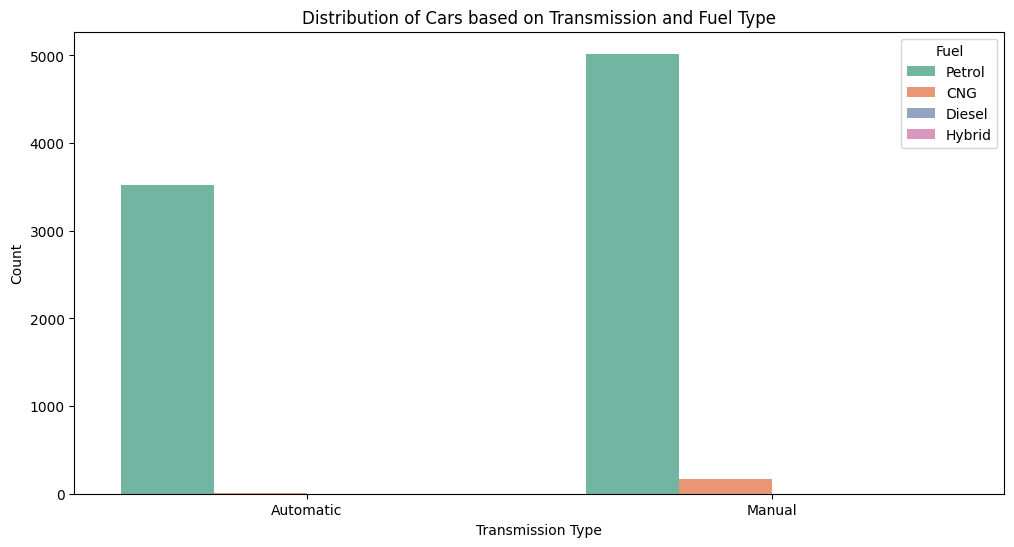

In [21]:
# Plotting a count plot for distribution of transmission types and fuel
plt.figure(figsize=(12, 6))
sns.countplot(x='Transmission', hue='Fuel', data=df, palette='Set2')
plt.title('Distribution of Cars based on Transmission and Fuel Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


**How are the prices distributed for cars with different assembly types and conditions?**

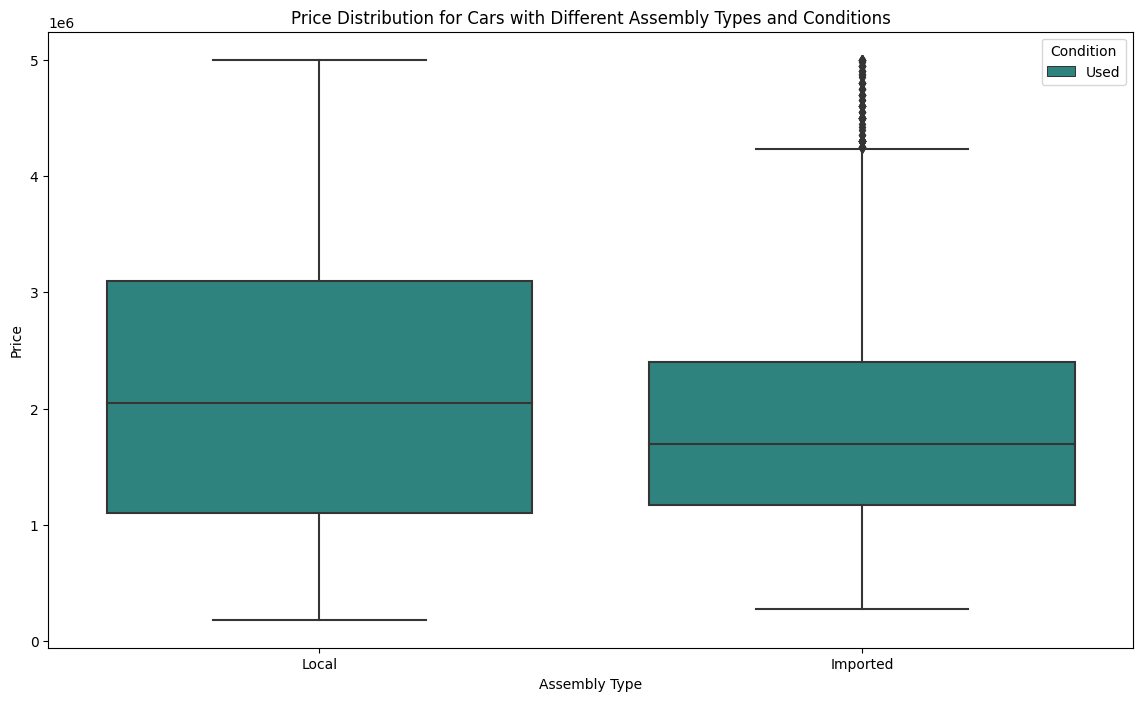

In [22]:
# Plotting a grouped boxplot for 'Assembly' and 'Condition' against 'Price'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Assembly', y='Price', hue='Condition', data=df, palette='viridis')
plt.title('Price Distribution for Cars with Different Assembly Types and Conditions')
plt.xlabel('Assembly Type')
plt.ylabel('Price')
plt.show()


**What is the proportion of cars with different transmission types?**

In [23]:
# Plotting a pie chart for the distribution of transmission types
transmission_counts = df['Transmission'].value_counts()
fig = px.pie(transmission_counts, names=transmission_counts.index, title='Distribution of Transmission Types')
fig.show()


**How does the mileage ('KM's driven') vary with the year of the car?**

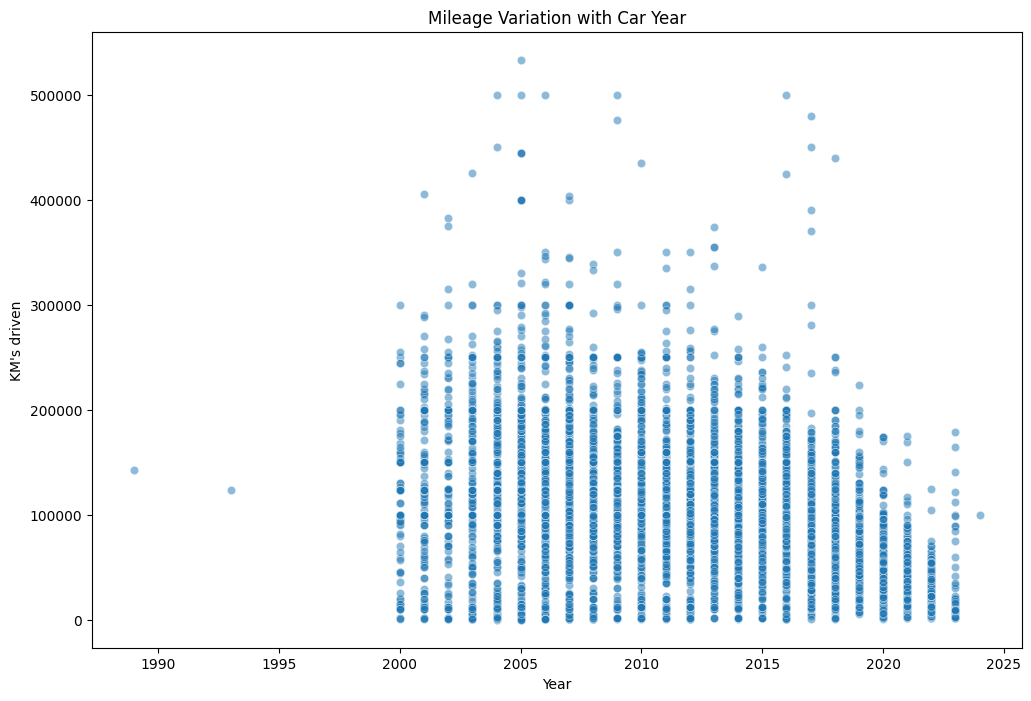

In [24]:
# Scatter plot to show the relationship between 'Year' and 'KM's driven'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='KM\'s driven', data=df, alpha=0.5)
plt.title('Mileage Variation with Car Year')
plt.xlabel('Year')
plt.ylabel('KM\'s driven')
plt.show()


**What are the most common car makes and models together in the dataset?**

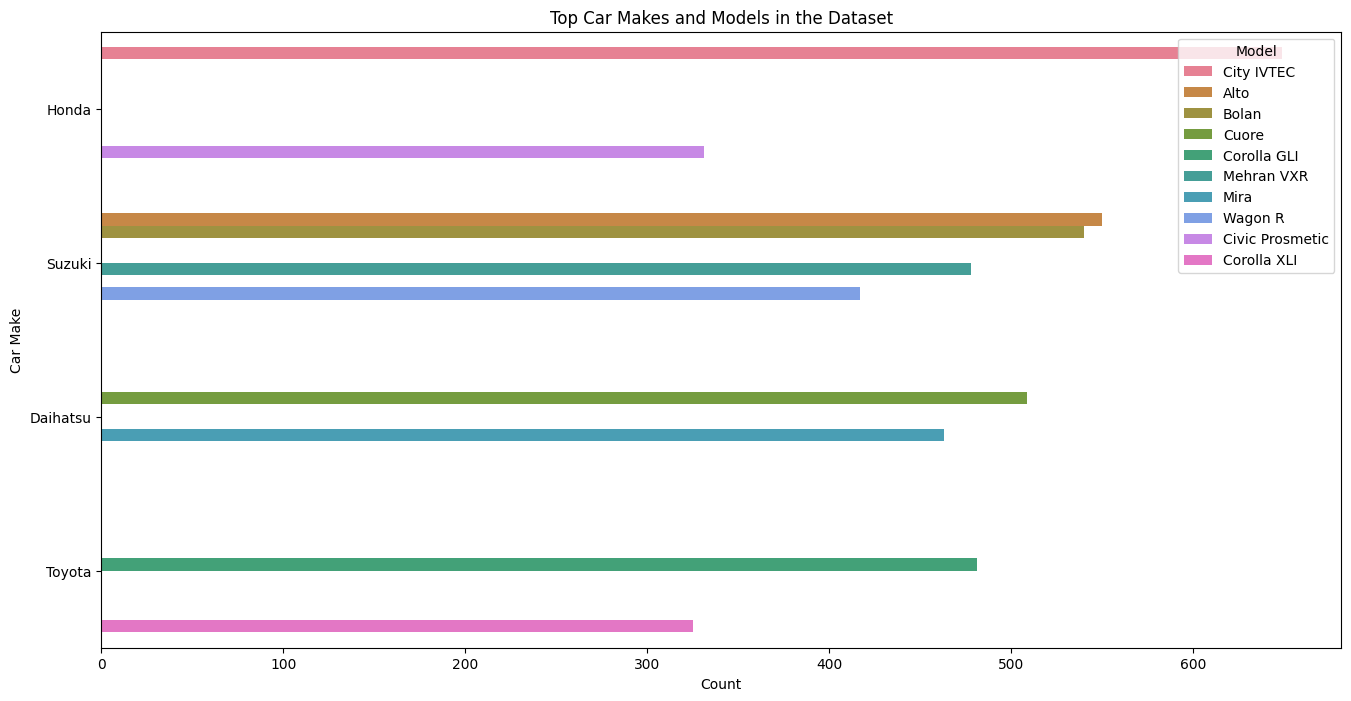

In [25]:
# Extracting and counting the most common car makes and models
top_makes_models = df.groupby(['Make', 'Model']).size().sort_values(ascending=False).head(10).reset_index(name='Count')

# Plotting a bar chart for the top makes and models
plt.figure(figsize=(16, 8))
sns.barplot(x='Count', y='Make', hue='Model', data=top_makes_models, palette='husl')
plt.title('Top Car Makes and Models in the Dataset')
plt.xlabel('Count')
plt.ylabel('Car Make')
plt.show()


**How is the distribution of prices for cars with different assembly types and transmission types?**

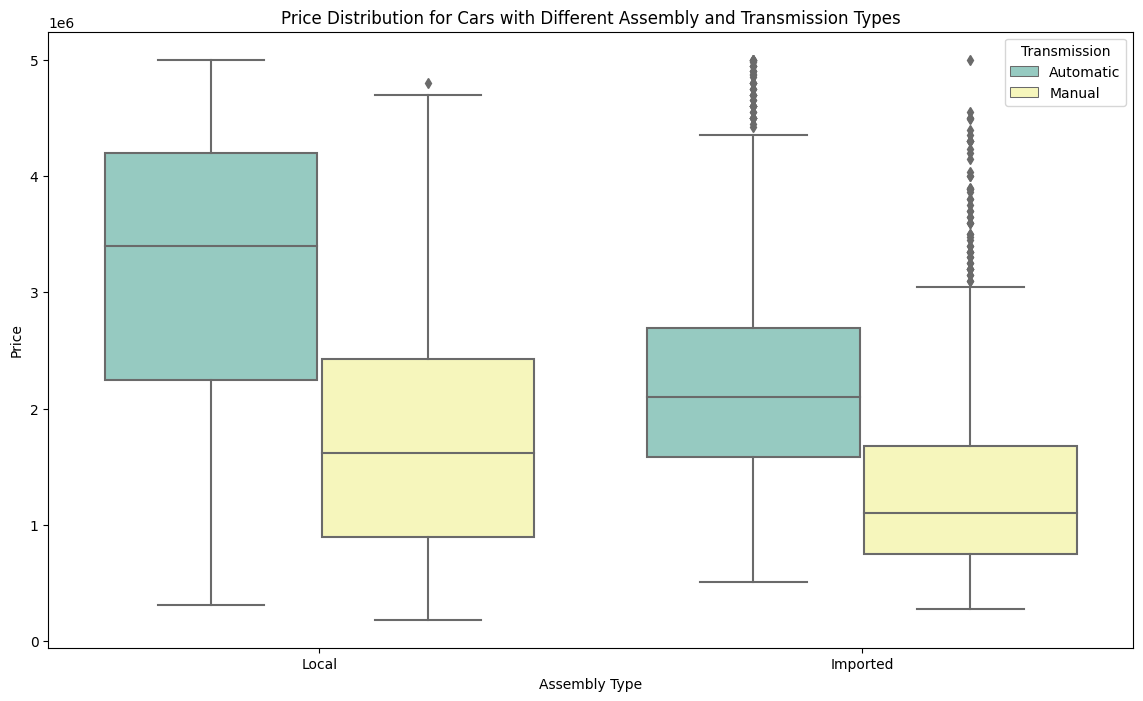

In [26]:
# Plotting a grouped boxplot for 'Assembly' and 'Transmission' against 'Price'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Assembly', y='Price', hue='Transmission', data=df, palette='Set3')
plt.title('Price Distribution for Cars with Different Assembly and Transmission Types')
plt.xlabel('Assembly Type')
plt.ylabel('Price')
plt.show()


**What is the distribution of the number of images provided for each car?**

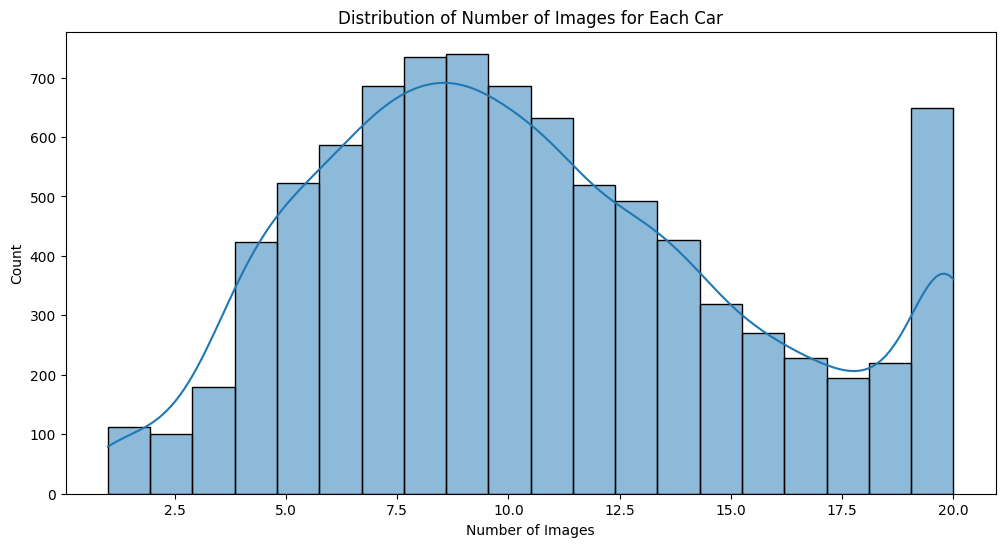

In [27]:
# Counting the number of images for each car
df['Num_Images'] = df['Images URL\'s'].apply(lambda x: len(str(x).split(',')))

# Plotting a histogram for the distribution of the number of images
plt.figure(figsize=(12, 6))
sns.histplot(df['Num_Images'], bins=20, kde=True)
plt.title('Distribution of Number of Images for Each Car')
plt.xlabel('Number of Images')
plt.ylabel('Count')
plt.show()


**How does the average price vary for cars of different makes and models?**

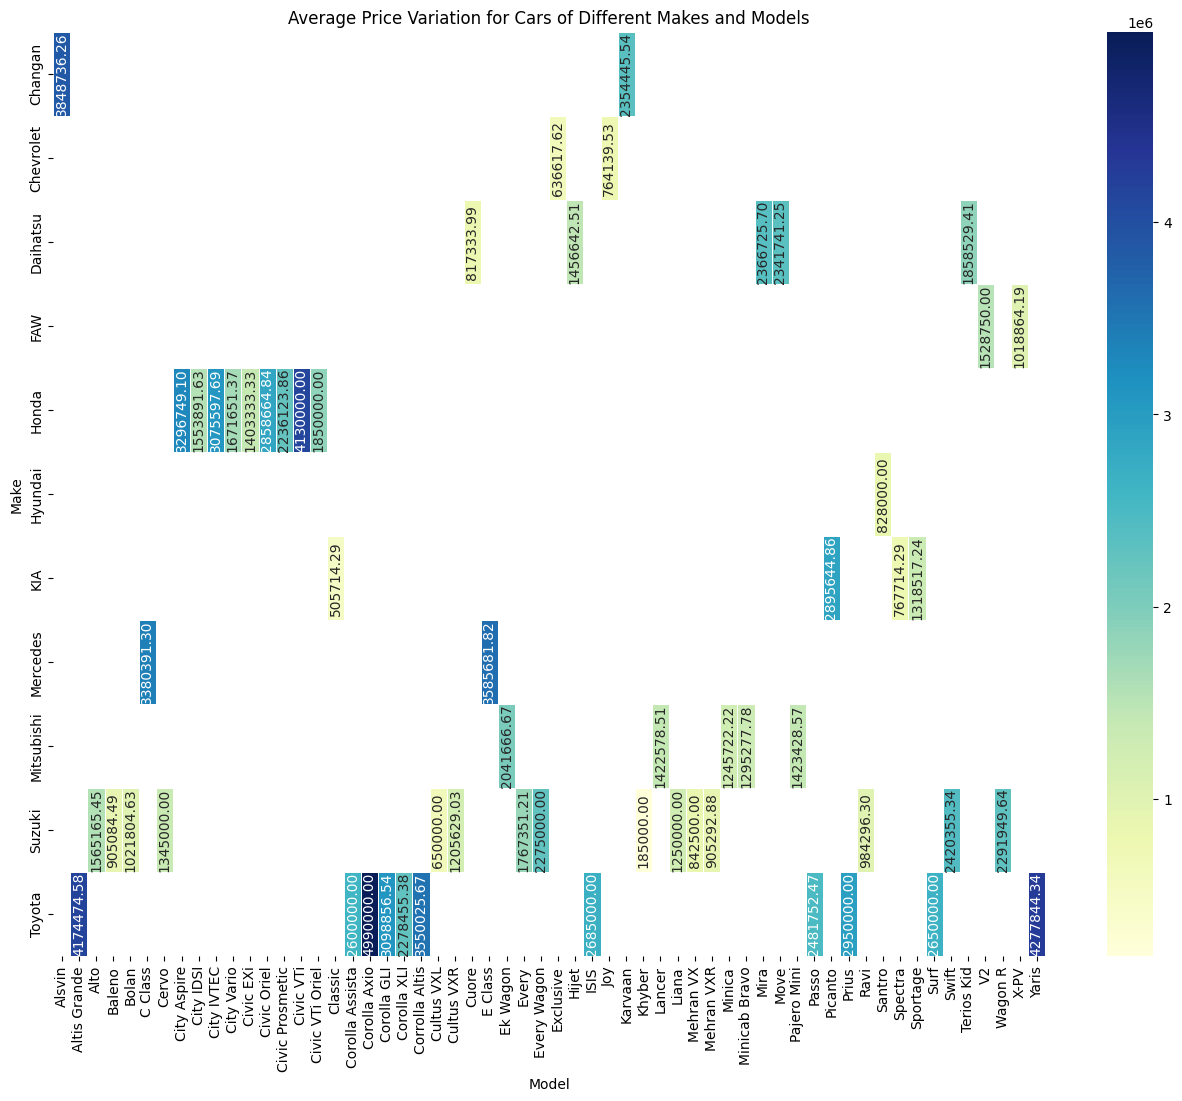

In [28]:
# Calculating and plotting a heatmap for average prices of different makes and models
avg_price_make_model = df.groupby(['Make', 'Model'])['Price'].mean().unstack()
plt.figure(figsize=(16, 12))
sns.heatmap(avg_price_make_model, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5, annot_kws={"rotation": 90})
plt.title('Average Price Variation for Cars of Different Makes and Models')
plt.xlabel('Model')
plt.ylabel('Make')
plt.show()
